# Capstone Project: Personalized Heart Health Intervention Prediction

## Problem Statement
### Overview of the Question
How can machine learning models optimize the prediction of personalized health interventions? This capstone project aims to investigate how individual physiological and behavioral data can be used to recommend interventions for improving health outcomes effectively.

## Type of Data Needed
To address this question, the project will require the following datasets:
- **Personalized Diet Recommendations Dataset**: Contains BMI, dietary habits, and recommended meal plans.
- **Heart Health Dataset**: Includes heart-related clinical data such as blood pressure, cholesterol levels, and heart attack history.
- **Diabetes Prediction Dataset**: Contains information on hypertension, heart disease, and blood glucose levels.
- **Healthcare Dataset**: Includes demographic details, medical conditions, medications, and test results.


In [2]:
import nltk
import time
import eli5
import string
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, f1_score, classification_report

sns.set_style("whitegrid")
sns.set_palette("rocket")

warnings.simplefilter(action='ignore')


[nltk_data] Downloading package wordnet to /Users/anumita/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anumita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/anumita/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
import pandas as pd

# Load datasets
heart_health_df = pd.read_csv("/Users/anumita/Downloads/Heart_health.csv")
diabetes_df = pd.read_csv("/Users/anumita/Downloads/diabetes_prediction_dataset.csv")
health_df = pd.read_csv("/Users/anumita/Downloads/healthcare_dataset.csv")
diet_df = pd.read_csv("/Users/anumita/Downloads/Personalized_diet_recommendations.csv")

# Verify
print(heart_health_df.head())  

   ID             Name  Age  Gender  Height(cm)  Weight(kg)  \
0   1         John Doe   45    Male         175          80   
1   2       Jane Smith   35  Female         160          65   
2   3  Michael Johnson   55    Male         180          85   
3   4      Sarah Brown   40  Female         165          70   
4   5        David Lee   50    Male         170          75   

  Blood Pressure(mmHg)  Cholesterol(mg/dL)  Glucose(mg/dL) Smoker  \
0               120/80                 200              90     No   
1               110/70                 180              80     No   
2               130/85                 220              95    Yes   
3               115/75                 190              85     No   
4               125/80                 210              92    Yes   

   Exercise(hours/week)  Heart Attack  
0                     3             0  
1                     2             0  
2                     4             1  
3                     3             0  
4     

### Data Preprocessing and Feature Selection

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder  # Ensure LabelEncoder is imported

# Load datasets
heart_health_df = pd.read_csv("/Users/anumita/Downloads/Heart_health.csv")
diabetes_df = pd.read_csv("/Users/anumita/Downloads/diabetes_prediction_dataset.csv")
diet_df = pd.read_csv("/Users/anumita/Downloads/Personalized_diet_recommendations.csv")

# Selecting features for predictive modeling
diet_features = diet_df[['Age', 'Gender', 'BMI', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Level', 'Daily_Steps', 'Exercise_Frequency', 'Sleep_Hours']]
heart_health_features = heart_health_df[['Age', 'Gender', 'Height(cm)', 'Weight(kg)', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Smoker', 'Exercise(hours/week)', 'Heart Attack']]
diabetes_features = diabetes_df[['age', 'gender', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'blood_glucose_level', 'diabetes']]

# Merging datasets
combined_df = pd.concat([diet_features, heart_health_features, diabetes_features], axis=0, ignore_index=True)

# Encoding variables
le = LabelEncoder()
combined_df['Gender'] = le.fit_transform(combined_df['Gender'].astype(str))
combined_df['Smoker'] = le.fit_transform(combined_df['Smoker'].astype(str))
combined_df['smoking_history'] = le.fit_transform(combined_df['smoking_history'].astype(str))


### Model Training and Evaluation

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load datasets
heart_health_df =pd.read_csv("/Users/anumita/Downloads/Heart_health.csv")
diabetes_df= pd.read_csv("/Users/anumita/Downloads/diabetes_prediction_dataset.csv")
diet_df =pd.read_csv("/Users/anumita/Downloads/Personalized_diet_recommendations.csv")

# Selecting relevant features 
diet_features = diet_df[['Age','Gender', 'BMI', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Level', 'Daily_Steps', 'Exercise_Frequency', 'Sleep_Hours']]
heart_health_features = heart_health_df[['Age', 'Gender', 'Height(cm)','Weight(kg)', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Smoker', 'Exercise(hours/week)', 'Heart Attack']]
diabetes_features = diabetes_df[['age', 'gender','hypertension', 'heart_disease', 'smoking_history', 'bmi', 'blood_glucose_level', 'diabetes']]

# Merging datasets
combined_df =pd.concat([diet_features, heart_health_features, diabetes_features], axis=0, ignore_index=True)

# Identify columns
categorical_columns = combined_df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:", categorical_columns)

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_columns:
    combined_df[col] = le.fit_transform(combined_df[col].astype(str))

# Check for NaN values
print("Missing values before handling:\n", combined_df.isnull().sum())

# Fill missing values with column mean
combined_df.fillna(combined_df.mean(), inplace=True)

# Define Features and Target
X = combined_df.drop(columns=['Heart Attack', 'diabetes', 'heart_disease'], errors='ignore')  # Ignore missing target columns if they exist
y = combined_df[['Heart Attack', 'diabetes', 'heart_disease']].max(axis=1, skipna=True)  # Binary classification

# Target variable to integer
y = y.fillna(0).astype(int)

# Unique values in y
print("Unique values in y:", y.unique())

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# No NaN or infinite values
print("Any NaN in X_train:", np.isnan(X_train).sum())
print("Any inf in X_train:", np.isinf(X_train).sum())

# Model Training - Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Model Evaluation
print('Random Forest Accuracy:', accuracy_score(y_test, rf_pred))
print('Random Forest Classification Report:')
print(classification_report(y_test, rf_pred))


Categorical Columns: ['Gender', 'Smoker', 'gender', 'smoking_history']
Missing values before handling:
 Age                         100000
Gender                           0
BMI                         100724
Blood_Pressure_Systolic     100724
Blood_Pressure_Diastolic    100724
Cholesterol_Level           100724
Daily_Steps                 100724
Exercise_Frequency          100724
Sleep_Hours                 100724
Height(cm)                  105000
Weight(kg)                  105000
Cholesterol(mg/dL)          105000
Glucose(mg/dL)              105000
Smoker                           0
Exercise(hours/week)        105000
Heart Attack                105000
age                           5724
gender                           0
hypertension                  5724
heart_disease                 5724
smoking_history                  0
bmi                           5724
blood_glucose_level           5724
diabetes                      5724
dtype: int64
Unique values in y: [0 1]
Any NaN in X_trai

### Principal Component Analysis (PCA)

Unique values in y: [0 1]
y data type: int64
Missing values in X before training:
 0
Missing values in y before training:
 0


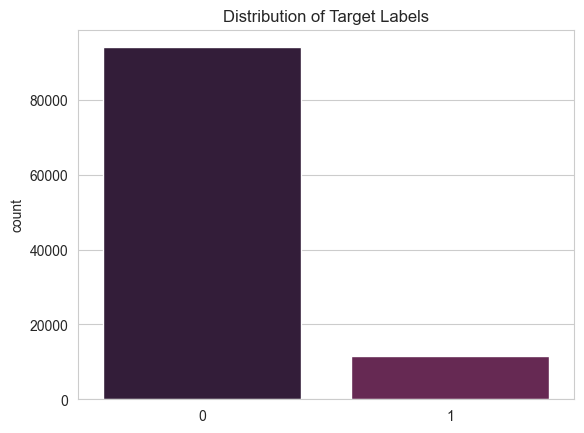

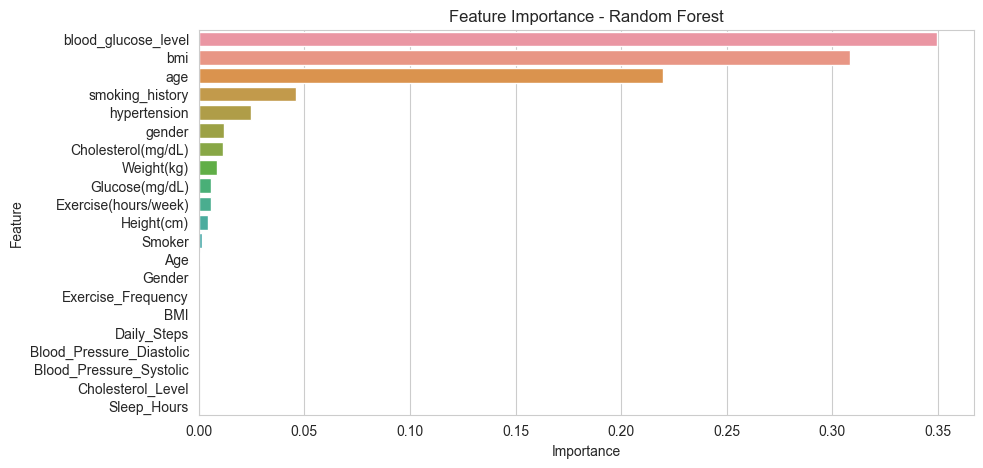

Explained Variance Ratios: [0.36962149 0.11165907 0.08358975 0.0683655  0.05526306]


In [8]:
!pip install imbalanced-learn

from sklearn.decomposition import PCA

print("Unique values in y:", y.unique())
print("y data type:", y.dtype)

print("Missing values in X before training:\n", X.isnull().sum().sum())  # Should be 0
print("Missing values in y before training:\n", y.isnull().sum())  # Should be 0

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Distribution of Target Labels")
plt.show()

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

importances = rf_model.feature_importances_
feature_names = X.columns
import pandas as pd

feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance - Random Forest")
plt.show()

# PCA Analysis
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print('Explained Variance Ratios:', pca.explained_variance_ratio_)

### Model Training - Logistic Regression and Decision Tree

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load datasets
heart_health_df = pd.read_csv("/Users/anumita/Downloads/Heart_health.csv")
diabetes_df = pd.read_csv("/Users/anumita/Downloads/diabetes_prediction_dataset.csv")
diet_df = pd.read_csv("/Users/anumita/Downloads/Personalized_diet_recommendations.csv")

# Selecting relevant features
diet_features = diet_df[['Age', 'Gender', 'BMI', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Level', 'Daily_Steps', 'Exercise_Frequency', 'Sleep_Hours']]
heart_health_features = heart_health_df[['Age', 'Gender', 'Height(cm)', 'Weight(kg)', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Smoker', 'Exercise(hours/week)', 'Heart Attack']]
diabetes_features = diabetes_df[['age', 'gender', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'blood_glucose_level', 'diabetes']]

# Merge datasets
combined_df = pd.concat([diet_features, heart_health_features, diabetes_features], axis=0, ignore_index=True)

# Encode variables
categorical_columns = combined_df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
for col in categorical_columns:
    combined_df[col] = le.fit_transform(combined_df[col].astype(str))

# Fill missing values
combined_df.fillna(combined_df.mean(), inplace=True)

# Define Features and Target
X = combined_df.drop(columns=['Heart Attack', 'diabetes', 'heart_disease'], errors='ignore')
y = combined_df[['Heart Attack', 'diabetes', 'heart_disease']].max(axis=1, skipna=True).fillna(0).astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle Imbalanced Data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Model Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_pred))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))


Logistic Regression Accuracy: 0.8002364625206905
Decision Tree Accuracy: 0.8765665641995743

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     18825
           1       0.33      0.83      0.48      2320

    accuracy                           0.80     21145
   macro avg       0.65      0.81      0.68     21145
weighted avg       0.90      0.80      0.83     21145


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     18825
           1       0.45      0.53      0.49      2320

    accuracy                           0.88     21145
   macro avg       0.69      0.72      0.71     21145
weighted avg       0.89      0.88      0.88     21145



### Model Training - Gradient Boosting

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load datasets
heart_health_df = pd.read_csv("/Users/anumita/Downloads/Heart_health.csv")
diabetes_df = pd.read_csv("/Users/anumita/Downloads/diabetes_prediction_dataset.csv")
diet_df = pd.read_csv("/Users/anumita/Downloads/Personalized_diet_recommendations.csv")

# Selecting relevant features
diet_features = diet_df[['Age', 'Gender', 'BMI', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Level', 'Daily_Steps', 'Exercise_Frequency', 'Sleep_Hours']]
heart_health_features = heart_health_df[['Age', 'Gender', 'Height(cm)', 'Weight(kg)', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Smoker', 'Exercise(hours/week)', 'Heart Attack']]
diabetes_features = diabetes_df[['age', 'gender', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'blood_glucose_level', 'diabetes']]

# Merge datasets
combined_df = pd.concat([diet_features, heart_health_features, diabetes_features], axis=0, ignore_index=True)

# Encode categorical variables
categorical_columns = combined_df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
for col in categorical_columns:
    combined_df[col] = le.fit_transform(combined_df[col].astype(str))

# Fill missing values
combined_df.fillna(combined_df.mean(), inplace=True)

# Define Features and Target
X = combined_df.drop(columns=['Heart Attack', 'diabetes', 'heart_disease'], errors='ignore')
y = combined_df[['Heart Attack', 'diabetes', 'heart_disease']].max(axis=1, skipna=True).fillna(0).astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle Imbalanced Data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Model Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))

### Model Evaluation

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load datasets
heart_health_df = pd.read_csv("/Users/anumita/Downloads/Heart_health.csv")
diabetes_df = pd.read_csv("/Users/anumita/Downloads/diabetes_prediction_dataset.csv")
diet_df = pd.read_csv("/Users/anumita/Downloads/Personalized_diet_recommendations.csv")

# Selecting relevant features
diet_features = diet_df[['Age', 'Gender', 'BMI', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Level', 'Daily_Steps', 'Exercise_Frequency', 'Sleep_Hours']]
heart_health_features = heart_health_df[['Age', 'Gender', 'Height(cm)', 'Weight(kg)', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Smoker', 'Exercise(hours/week)', 'Heart Attack']]
diabetes_features = diabetes_df[['age', 'gender', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'blood_glucose_level', 'diabetes']]

# Merge datasets
combined_df = pd.concat([diet_features, heart_health_features, diabetes_features], axis=0, ignore_index=True)

# Encode variables
categorical_columns = combined_df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
for col in categorical_columns:
    combined_df[col] = le.fit_transform(combined_df[col].astype(str))

# Fill missing values
combined_df.fillna(combined_df.mean(), inplace=True)

# Define Features and Target
X = combined_df.drop(columns=['Heart Attack', 'diabetes', 'heart_disease'], errors='ignore')
y = combined_df[['Heart Attack', 'diabetes', 'heart_disease']].max(axis=1, skipna=True).fillna(0).astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle Imbalanced Data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Model Evaluation
print('Logistic Regression Accuracy:', accuracy_score(y_test, log_pred))
print('Decision Tree Accuracy:', accuracy_score(y_test, dt_pred))
print('Gradient Boosting Accuracy:', accuracy_score(y_test, gb_pred))

print('\nLogistic Regression Classification Report:')
print(classification_report(y_test, log_pred))

print('\nDecision Tree Classification Report:')
print(classification_report(y_test, dt_pred))

print('\nGradient Boosting Classification Report:')
print(classification_report(y_test, gb_pred))


Logistic Regression Accuracy: 0.8002364625206905
Decision Tree Accuracy: 0.8772759517616457
Gradient Boosting Accuracy: 0.8374556632773705

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     18825
           1       0.33      0.83      0.48      2320

    accuracy                           0.80     21145
   macro avg       0.65      0.81      0.68     21145
weighted avg       0.90      0.80      0.83     21145


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     18825
           1       0.45      0.53      0.49      2320

    accuracy                           0.88     21145
   macro avg       0.70      0.72      0.71     21145
weighted avg       0.89      0.88      0.88     21145


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.97     